# **Introduction: Predicting Investment Attractiveness in Sustainable Energy**


The transition towards sustainable energy is one of the defining global challenges of the 21st century. Governments, private investors, and international organizations face the pressing task of identifying where investments in renewable energy infrastructure are most needed and most promising. Countries differ widely in their renewable energy adoption, economic stability, access to electricity, and reliance on fossil fuels—factors that together shape the attractiveness of sustainable energy investments.

## **In this study, we define Investment Attractiveness as a combination of three interrelated dimensions:**
	1.	Market dynamics – measured by whether renewable energy capacity is growing above 10% per year. A country already experiencing expansion in renewables signals favorable policy, market readiness, and existing infrastructure for scaling up.
	2.	Macroeconomic stability and demand – proxied by GDP growth above 2%, indicating sufficient economic momentum to sustain new investments and rising energy needs.
	3.	Structural energy needs – reflected either in incomplete electricity access (less than 95% of the population connected) or in a heavy reliance on fossil fuels (more than 50% of total energy). These conditions capture both the urgency of infrastructure expansion and the need for decarbonization.

This tripartite definition balances opportunity (growth and demand) with necessity (infrastructure gaps and fossil dependence). It is consistent with empirical evidence from organizations such as IRENA, REN21, and the World Bank, which identify these dimensions as critical drivers for renewable energy investment flows.

This notebook develops a classification model pipeline to predict the Investment Attractiveness of countries using historical data on energy, environment, and socioeconomic indicators (2000–2019). By framing the problem as a binary classification task, we aim to identify which countries are likely to be attractive for sustainable energy investments based on their recent development trajectories.

## **The analysis proceeds in six main stages:**
	1.	Data Loading and Initial Exploration: Import the dataset and perform an initial examination of the available indicators.
	2.	Data Preprocessing and Target Variable Definition: Clean and structure the data, calculate derived indicators (e.g., 5-year growth rates, fossil fuel shares), and define the binary target variable Investment Attractiveness according to the criteria above.
	3.	Feature Engineering: Generate additional explanatory features from trends, ratios, and volatility measures to better capture country-level dynamics.
	4.	Data Splitting Strategies: Compare random and time-based train–test splits, with emphasis on time-aware evaluation to reflect realistic forecasting conditions.
	5.	Model Training and Evaluation: Train classification models (Random Forest, Gradient Boosting) and assess their performance using precision, recall, and ROC-AUC.
	6.	Model Comparison: Analyze results across models and splitting strategies to determine the most reliable approach.

## **Purpose:**
The purpose of this study is to support evidence-based decision-making for sustainable energy investments. By predicting investment attractiveness, the model can highlight where financing could have the greatest impact on accelerating the global energy transition.

## **Hypothesis:**
We hypothesize that countries with strong growth in renewable capacity, stable GDP growth, and either high fossil dependence or incomplete electricity access are more attractive for sustainable energy investments than countries with stagnant renewables growth and mature electricity infrastructure.

## **Project Reflection: Framing for the Real World**

Our project aims to predict investment attractiveness in sustainable energy, automating the decision of where to best allocate resources. The unit of prediction is a country, forecasting the outcome of being classified as "attractive" based on growth, economic, and infrastructure criteria, with a prediction horizon typically 1-5 years out.

Stakeholders include investors and project developers benefiting from guided capital allocation, host governments gaining economic development, and citizens globally benefiting from a cleaner environment. Potential harms exist for fossil fuel workers facing job displacement and local communities impacted by new infrastructure.

Our primary success metric is **Precision** in identifying attractive countries. While high accuracy and recall are also desirable, avoiding false positives (classifying a country as attractive when it's not) is crucial to prevent misallocation of valuable investment capital, which has significant cost trade-offs.

Regarding feature timing, we use a time-based split, training on historical data (2000-2014) to predict future periods (2018-2019), ensuring our features are available *before* the prediction horizon.

Based on the EU AI Act, this system is expected to fall under a **low-risk AI tier** as it provides investment recommendations and doesn't directly impact fundamental rights. My personal ethical concern is ensuring the model does not inadvertently perpetuate biases that disadvantage certain countries or regions, potentially widening energy access gaps instead of closing them.

### **What decision will be automated?**
The decision to be automated is whether a country is attractive for investing in renewable energy projects, based on the defined criteria: renewable energy capacity growth above 10%, GDP growth above 2%, and either less than 95% of the population connected to electricity or more than 50% of total energy from fossil fuels.

### **What unit is being predicted?**
 The unit being predicted is "investment attractiveness" for a country.

### **What event are we forecasting?**
We are forecasting the event of a country being classified as "attractive" for sustainable energy investment based on the defined criteria for a given year.

### **What is the prediction horizon (how far ahead)?**
Based on the time-based splitting strategy used (training on 2000-2014, validating on 2015-2017, and testing on 2018-2019), the prediction horizon is typically 1 to 5 years into the future from the latest data available in the training set. Specifically, the model was tested on data from 2018-2019, which is 4-5 years after the end of the training period (2014).

### **What evidence is available before that decision must be made?**
The evidence available before the decision is made includes historical data up to the prediction year on various energy, environment, and socioeconomic indicators for each country, as used in the training data (2000-2014 for the time-based split). This includes features like access to electricity, access to clean fuels for cooking, renewable electricity generating capacity per capita, financial flows, renewable energy share, electricity from different sources, energy intensity, CO2 emissions, GDP growth, and GDP per capita. Additionally, the engineered features like rolling averages and CAGR values based on this historical data are also available evidence.



## **Table of Content**




# Table of Content

1. **Introduction: Predicting Investment Attractiveness in Sustainable Energy**
2. Project Reflection & Stakeholder Risk Score
3. Data Loading and Initial Exploration
4. Data Quality Assessment
5. Target Variable Definition
6. Data Preprocessing and Feature Engineering
    - Feature Engineering
    - Label Refinement using Clustering
    - Handling Missing Values
    - Imputation
7. Data Splitting Strategies
    - Random Split
    - Time-based Split
8. Feature Scaling
9. Model Training and Evaluation
    - RandomForestClassifier
    - GradientBoostingClassifier
    - Model Comparison
10. Feature Importance Analysis
11. Label Comparison (Rule-based vs Cluster-based)
12. Visualizations
    - Investment Attractiveness Maps
    - EDA Roadmap
13. Class Weights and Resampling
14. Summary of Findings




### Stakeholder Risk Score for Sustainable Energy Investments

'Stakeholder Impact Analysis with Risk Scores:'

,entity,impact_type,direct_indirect,severity,likelihood,risk_score
5,Environment,Benefit,Indirect,5,5,25
4,Fossil Fuel Industry Workers,Harm,Direct,5,4,20
0,Investors,Benefit,Direct,4,4,16
3,Project Developers,Benefit,Direct,4,4,16
1,Governments (Host Countries),Benefit,Direct,4,3,12
2,Local Communities,Benefit/Harm,Indirect,3,3,9


/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_21043/2417382558.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='risk_score', y='entity', data=stakeholders_sorted, palette='viridis')


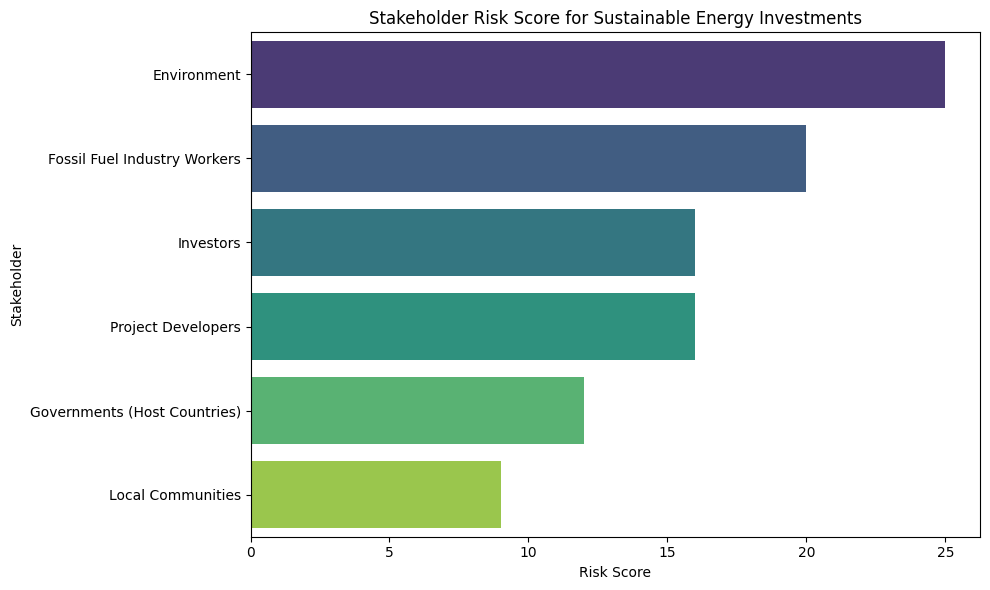

'\nRisk Score Interpretation:'

'Risk score >= 15: Requires mitigation plan'

'Prioritize top-right quadrant harms (Indirect and Harmful) with high risk scores.'

'\nStakeholders requiring mitigation (Risk Score >= 15):'

,entity,impact_type,direct_indirect,severity,likelihood,risk_score
5,Environment,Benefit,Indirect,5,5,25
4,Fossil Fuel Industry Workers,Harm,Direct,5,4,20
0,Investors,Benefit,Direct,4,4,16
3,Project Developers,Benefit,Direct,4,4,16


In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for stakeholders and their potential impacts
# You will need to customize the entities and their scores based on the context of sustainable energy investments
stakeholders = pd.DataFrame({
    "entity": ["Investors", "Governments (Host Countries)", "Local Communities",
               "Project Developers", "Fossil Fuel Industry Workers", "Environment"],
    "impact_type": ["Benefit", "Benefit", "Benefit/Harm",
                    "Benefit", "Harm", "Benefit"], # Categorize as Benefit, Harm, or Benefit/Harm
    "direct_indirect": ["Direct", "Direct", "Indirect",
                         "Direct", "Direct", "Indirect"], # Categorize as Direct or Indirect
    "severity": [4, 4, 3, 4, 5, 5], # Severity of impact (1-5)
    "likelihood": [4, 3, 3, 4, 4, 5] # Likelihood of impact (1-5)
})

# Calculate the Risk Score
stakeholders["risk_score"] = stakeholders["severity"] * stakeholders["likelihood"]

# Sort stakeholders by risk score in descending order
stakeholders_sorted = stakeholders.sort_values("risk_score", ascending=False)

display("Stakeholder Impact Analysis with Risk Scores:")
display(stakeholders_sorted)

# Create a bar plot to visualize risk scores
plt.figure(figsize=(10, 6))
sns.barplot(x='risk_score', y='entity', data=stakeholders_sorted, palette='viridis')
plt.title('Stakeholder Risk Score for Sustainable Energy Investments')
plt.xlabel('Risk Score')
plt.ylabel('Stakeholder')
plt.tight_layout()
plt.show()

# Interpretation of Risk Scores (Example)
display("\nRisk Score Interpretation:")
display("Risk score >= 15: Requires mitigation plan")
display("Prioritize top-right quadrant harms (Indirect and Harmful) with high risk scores.")

# Identify stakeholders requiring mitigation (example threshold)
mitigation_threshold = 15
stakeholders_requiring_mitigation = stakeholders_sorted[stakeholders_sorted['risk_score'] >= mitigation_threshold]

if not stakeholders_requiring_mitigation.empty:
    display(f"\nStakeholders requiring mitigation (Risk Score >= {mitigation_threshold}):")
    display(stakeholders_requiring_mitigation)
else:
    display(f"\nNo stakeholders require mitigation based on the current threshold ({mitigation_threshold}).")

**Explanation and Interpretation of the Stakeholder Risk Score Chart:**

The bar chart visualizes the **Risk Score** for each identified stakeholder group in the context of sustainable energy investments.

*   **X-axis (Risk Score):** Represents the calculated risk score for each stakeholder (Severity × Likelihood). A higher score indicates a higher overall risk associated with that stakeholder's impact.
*   **Y-axis (Stakeholder):** Lists the different stakeholder groups considered.
*   **Bars:** The length of each bar corresponds to the risk score. Longer bars indicate higher risk scores. The bars are sorted in descending order of risk score.

**Interpretation:**

The chart shows which stakeholders have the highest calculated risk scores:

*   The **Environment** has the highest risk score (25), indicating a high severity and likelihood of impact.
*   **Fossil Fuel Industry Workers** have the second highest risk score (20), reflecting potential harm to jobs and livelihoods.
*   **Project Developers** and **Investors** have risk scores of 16, reflecting potential benefits.
*   **Governments (Host Countries)** have a risk score of 12.
*   **Local Communities** have the lowest risk score (9).

Based on a mitigation threshold of 15, the Environment, Fossil Fuel Industry Workers, Project Developers, and Investors would warrant consideration for mitigation strategies. This chart helps prioritize which stakeholder impacts require the most attention and planning.

# 1. Data Loading and Initial Exploration:

In [193]:
import os
print(os.getcwd())

/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/notebooks


In [194]:
import pandas as pd

# Import the dataset

df = pd.read_csv("../Data/Raw/global-data-on-sustainable-energy.csv")
# Display a concise summary of the DataFrame
display("Summary of the DataFrame after feature engineering and imputation:")
display(df.info())

# Display descriptive statistics for the numerical columns
display("Descriptive statistics for numerical columns after feature engineering and imputation:")
display(df.describe())

# Display the first few rows of the dataframe
display(df.head())

'Summary of the DataFrame after feature engineering and imputation:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

None

'Descriptive statistics for numerical columns after feature engineering and imputation:'

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [195]:
import pandas as pd
import numpy as np

# Basic missing value overview
def quick_missing_analysis(df):
    """Provides a quick summary of missing values per column."""
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100

    print("Missing Value Summary:")
    # Filter to show only columns with missing values
    missing_info = pd.DataFrame({'Count': missing_counts, 'Percent': missing_percent})
    missing_info = missing_info[missing_info['Count'] > 0].sort_values(by='Count', ascending=False)

    if not missing_info.empty:
        display(missing_info)
    else:
        print("No missing values found.")


# Range and Distribution Checks
# Quick sanity checks for numerical data
def basic_range_check(df):
    """Performs basic range checks for numerical columns."""
    numeric_cols = df.select_dtypes(include=np.number).columns

    print("\nBasic Range Check (Min/Max for Numerical Columns):")
    if not numeric_cols.empty:
        for col in numeric_cols:
            print(f"  {col}: min={df[col].min()}, max={df[col].max()}")
    else:
        print("No numerical columns found for range check.")

# Apply the data quality assessment functions to your DataFrame 'df'
# Ensure 'df' is the DataFrame you want to assess (e.g., after initial loading)
# If 'df' has been modified significantly (e.g., columns dropped),
# the output will reflect the current state of 'df'.

quick_missing_analysis(df)
basic_range_check(df)

Missing Value Summary:


,Count,Percent
Renewables (% equivalent primary energy),2137,58.563990
Financial flows to developing countries (US $),2089,57.248561
Renewable-electricity-generating-capacity-per-capita,931,25.513839
Value_co2_emissions_kt_by_country,428,11.729241
gdp_growth,317,8.687312
gdp_per_capita,282,7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP),207,5.672787
Renewable energy share in the total final energy consumption (%),194,5.316525
Access to clean fuels for cooking,169,4.631406
Electricity from nuclear (TWh),126,3.453001



Basic Range Check (Min/Max for Numerical Columns):
  Year: min=2000, max=2020
  Access to electricity (% of population): min=1.2522693, max=100.0
  Access to clean fuels for cooking: min=0.0, max=100.0
  Renewable-electricity-generating-capacity-per-capita: min=0.0, max=3060.19
  Financial flows to developing countries (US $): min=0.0, max=5202310000.0
  Renewable energy share in the total final energy consumption (%): min=0.0, max=96.04
  Electricity from fossil fuels (TWh): min=0.0, max=5184.13
  Electricity from nuclear (TWh): min=0.0, max=809.41
  Electricity from renewables (TWh): min=0.0, max=2184.94
  Low-carbon electricity (% electricity): min=0.0, max=100.00001
  Primary energy consumption per capita (kWh/person): min=0.0, max=262585.7
  Energy intensity level of primary energy (MJ/$2017 PPP GDP): min=0.11, max=32.57
  Value_co2_emissions_kt_by_country: min=9.999999776, max=10707219.73
  Renewables (% equivalent primary energy): min=0.0, max=86.836586
  gdp_growth: min=-62.07

# 2. Target Variable Definition:

>Define the binary target variable Investment Attractiveness according to the criteria above.



In [196]:
import numpy as np
# Sort the data by country and year to enable rolling calculation
df = df.sort_values(by=['Entity', 'Year'])

# Calculate the rolling 5-year growth rate for ‘Renewable-electricity-generating-capacity-per-capita’
# We use pct_change() with a period of 5 years and multiply by 100 for the percentage
# Set fill_method=None to avoid the Future Warning
df['Renewable_capacity_growth_5y'] = df.groupby('Entity')['Renewable-electricity-generating-capacity-per-capita'].pct_change(periods=5, fill_method=None) * 100

# Calculate the share of fossil fuels in total electricity generation
df['Total_electricity'] = df['Electricity from fossil fuels (TWh)'] + df['Electricity from nuclear (TWh)'] + df['Electricity from renewables (TWh)']
df['Fossil_share'] = (df['Electricity from fossil fuels (TWh)'] / df['Total_electricity']) * 100

# Define the target variable ‘Investment Attractiveness’
# Set a threshold for renewable capacity growth (X%)
X = 10 # Example value, can be adjusted

df['Investment Attractiveness'] = 0 # Set to 0 by default

# Conditions for Investment Attractiveness = 1
condition_renewable_growth = df['Renewable_capacity_growth_5y'] > X
condition_gdp_growth = df['gdp_growth'] >= 2
condition_access_fossil = (df['Access to electricity (% of population)'] < 95) | (df['Fossil_share'] > 50)

df.loc[condition_renewable_growth & condition_gdp_growth & condition_access_fossil, 'Investment Attractiveness'] = 1


# Display the first rows with the new columns
display(df[['Entity', 'Year', 'Renewable_capacity_growth_5y', 'Fossil_share', 'Investment Attractiveness']].head(20))

,Entity,Year,Renewable_capacity_growth_5y,Fossil_share,Investment Attractiveness
0,Afghanistan,2000,NaN,34.042553,0
1,Afghanistan,2001,NaN,15.254237,0
2,Afghanistan,2002,NaN,18.840580,0
3,Afghanistan,2003,NaN,32.978723,0
4,Afghanistan,2004,NaN,37.078652,0
5,Afghanistan,2005,-18.546638,36.559140,0
6,Afghanistan,2006,-16.478555,23.809524,0
7,Afghanistan,2007,-14.403778,21.052632,0
8,Afghanistan,2008,-7.416564,26.027397,0
9,Afghanistan,2009,-3.225806,17.021277,0


# EDA Road-Map for Classification Tasks

In [197]:
# 1. Data Snapshot
display("Data Snapshot:")
display("First 5 rows of the DataFrame:")
display(df.head())

display("\nConcise summary of the DataFrame:")
display(df.info())

display("\nDescriptive statistics for numerical columns:")
display(df.describe())

'Data Snapshot:'

'First 5 rows of the DataFrame:'

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share,Investment Attractiveness
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,NaN,NaN,60,652230.0,33.93911,67.709953,NaN,0.47,34.042553,0
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,NaN,NaN,60,652230.0,33.93911,67.709953,NaN,0.59,15.254237,0
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,NaN,179.426579,60,652230.0,33.93911,67.709953,NaN,0.69,18.840580,0
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,8.832278,190.683814,60,652230.0,33.93911,67.709953,NaN,0.94,32.978723,0
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,1.414118,211.382074,60,652230.0,33.93911,67.709953,NaN,0.89,37.078652,0


'\nConcise summary of the DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 25 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

None

'\nDescriptive statistics for numerical columns:'

/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/.venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),...,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share,Investment Attractiveness
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,...,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000,1955.000000,3523.000000,3502.000000,3649.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,...,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695,inf,106.403713,62.572058,0.157577
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,...,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148,NaN,495.202098,34.539762,0.364394
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242,-64.329897,0.000000,0.000000,0.000000
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,...,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889,-3.698616,0.880000,34.694173,0.000000
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,...,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136,15.489749,8.240000,71.181309,0.000000
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,...,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616,85.048751,43.005000,97.332726,0.000000
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,...,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032,inf,7735.270000,100.000000,1.000000


In [198]:
# 2. Target Check
display("Target Variable Distribution:")
display(y.value_counts())

display("\nTarget Variable Distribution (Percentage):")
display(y.value_counts(normalize=True) * 100)

'Target Variable Distribution:'

Investment Attractiveness
0    3074
1     575
Name: count, dtype: int64

'\nTarget Variable Distribution (Percentage):'

Investment Attractiveness
0    84.242258
1    15.757742
Name: proportion, dtype: float64

'Data Types of Each Feature:'

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

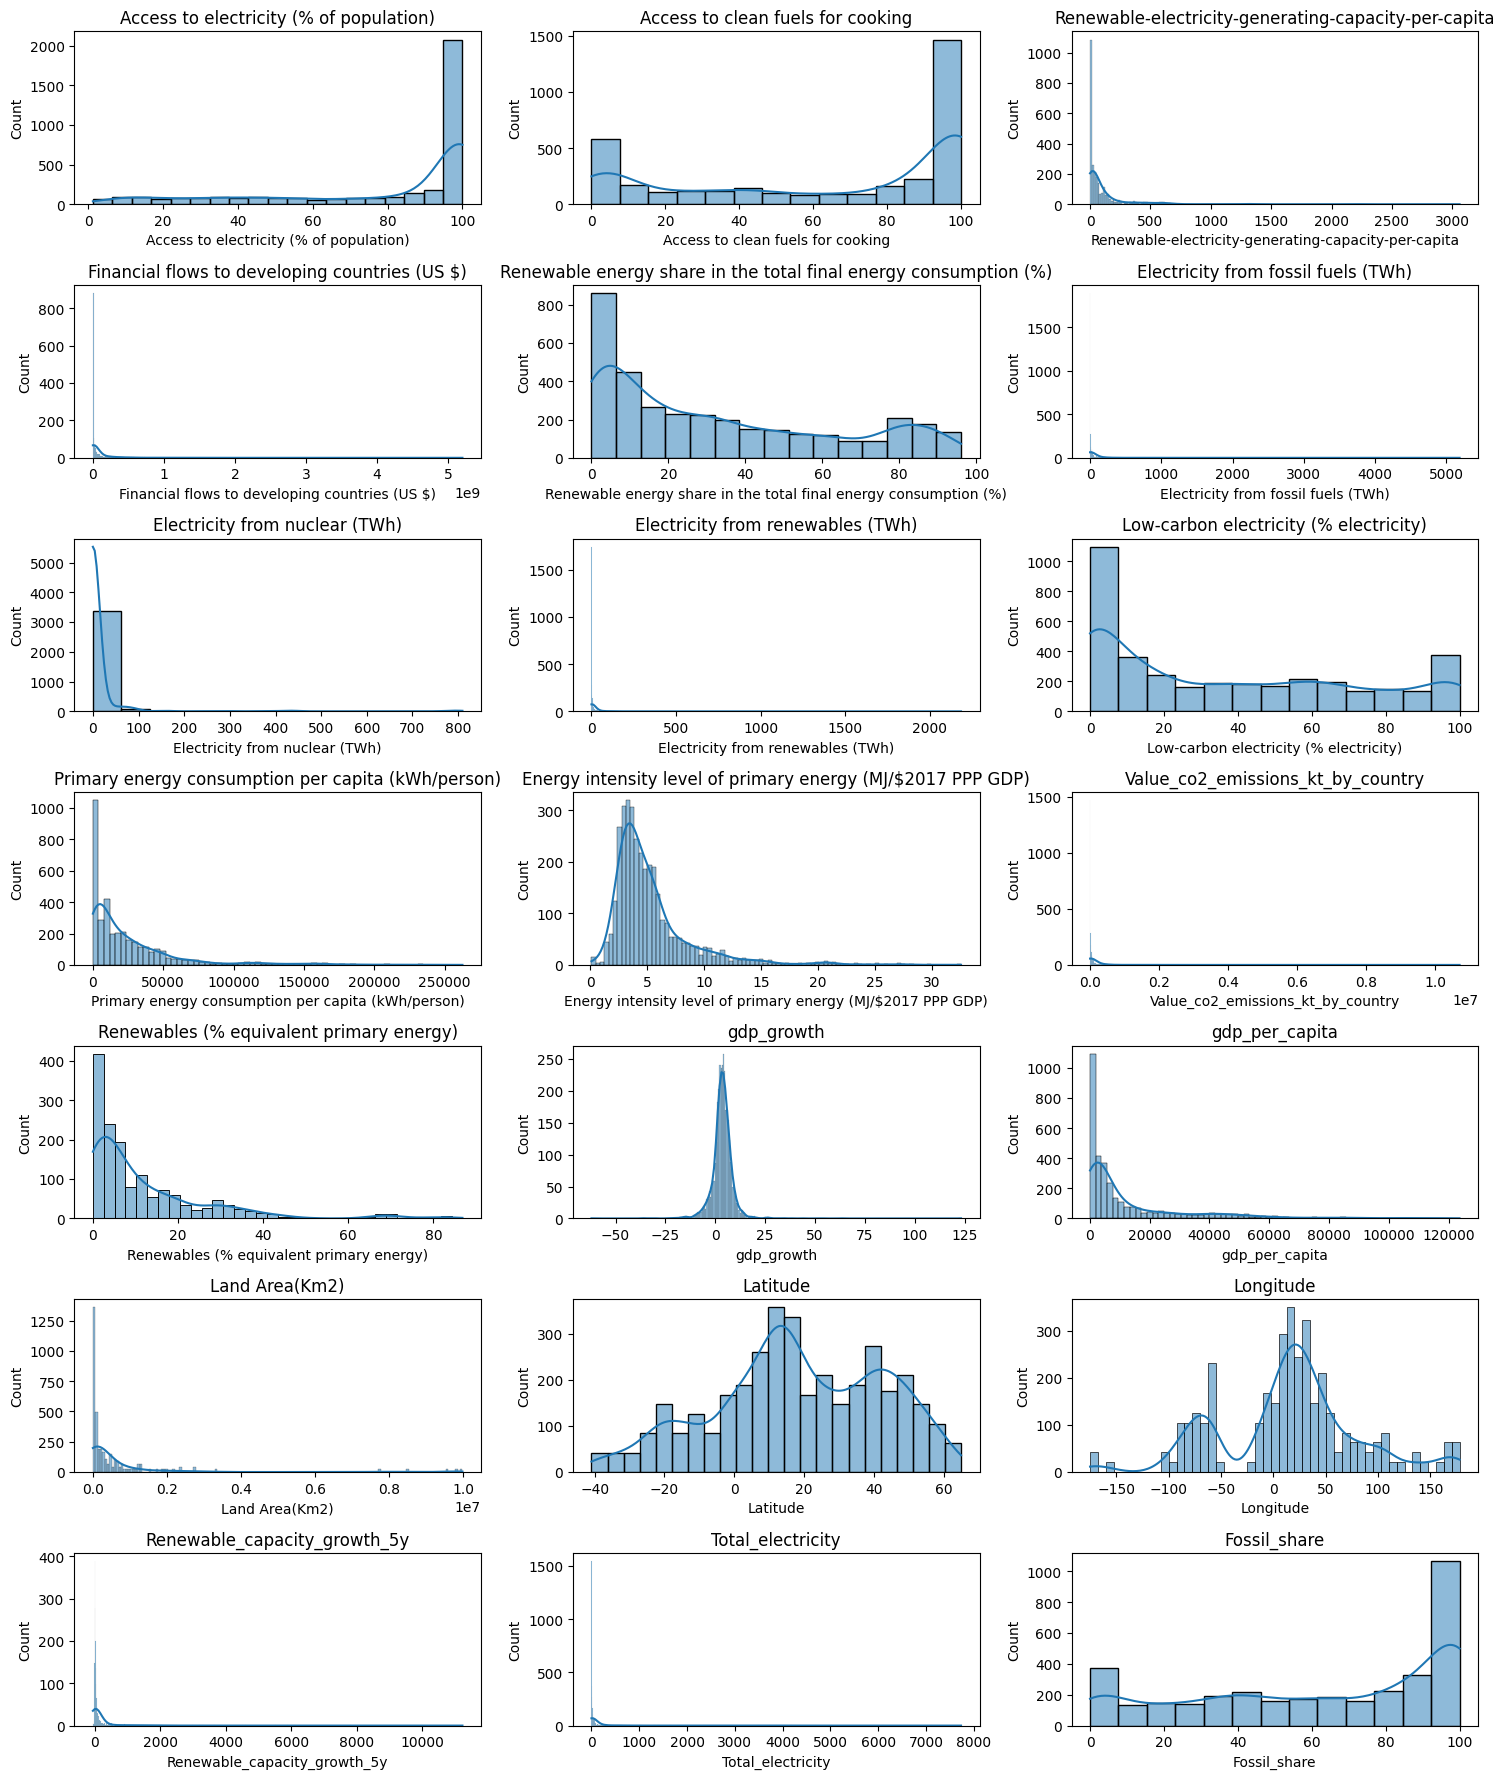

In [199]:

# 3. Variable Typing
display("Data Types of Each Feature:")
display(df.dtypes)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numerical columns for univariate analysis
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude 'Year' and the target variable from univariate plots
cols_to_plot = [col for col in numeric_cols if col not in ['Year', 'Investment Attractiveness']]

# Plot histograms for numerical features
plt.figure(figsize=(15, 20))
for i, col in enumerate(cols_to_plot):
    plt.subplot(len(cols_to_plot)//3 + 1, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True) # Drop NaNs for plotting
    plt.title(col)
plt.tight_layout()
plt.show()




**Interpretation of Univariate Plots for Numerical Features**

The univariate plots (histograms with KDE curves) provide insights into the distribution of each numerical feature in the dataset. Here are key points to consider:

1. **Skewness and Outliers**:
    - Many features exhibit skewed distributions, with long tails indicating the presence of outliers or countries with extreme values (e.g., GDP per capita, CO2 emissions).
    - Features like 'Renewable_capacity_growth_5y' and 'Fossil_share' may show right or left skewness, reflecting that most countries cluster at lower or higher values, respectively.

2. **Central Tendency and Spread**:
    - The location of the peak (mode) and the spread (width) of each histogram reveal the typical range for each indicator.
    - For example, 'Access to electricity (% of population)' may have a peak near 100%, but a spread toward lower values highlights countries with incomplete access.

3. **Feature-Specific Patterns**:
    - Economic indicators (GDP growth, GDP per capita) often show a concentration around global averages, with a few countries experiencing rapid growth or high wealth.
    - Energy indicators (renewable capacity, fossil share) display diversity, indicating varying energy mixes and transition stages across countries.

4. **Implications for Modeling**:
    - Features with wide spread and clear separation may be more informative for classification.
    - Highly imbalanced or zero-inflated features may require transformation or careful handling to avoid bias in the model.

**Conclusion**:
The univariate analysis confirms substantial heterogeneity in country-level energy and economic indicators, supporting the need for feature engineering and scaling. These patterns help identify which features are likely to be most discriminative for predicting investment attractiveness.

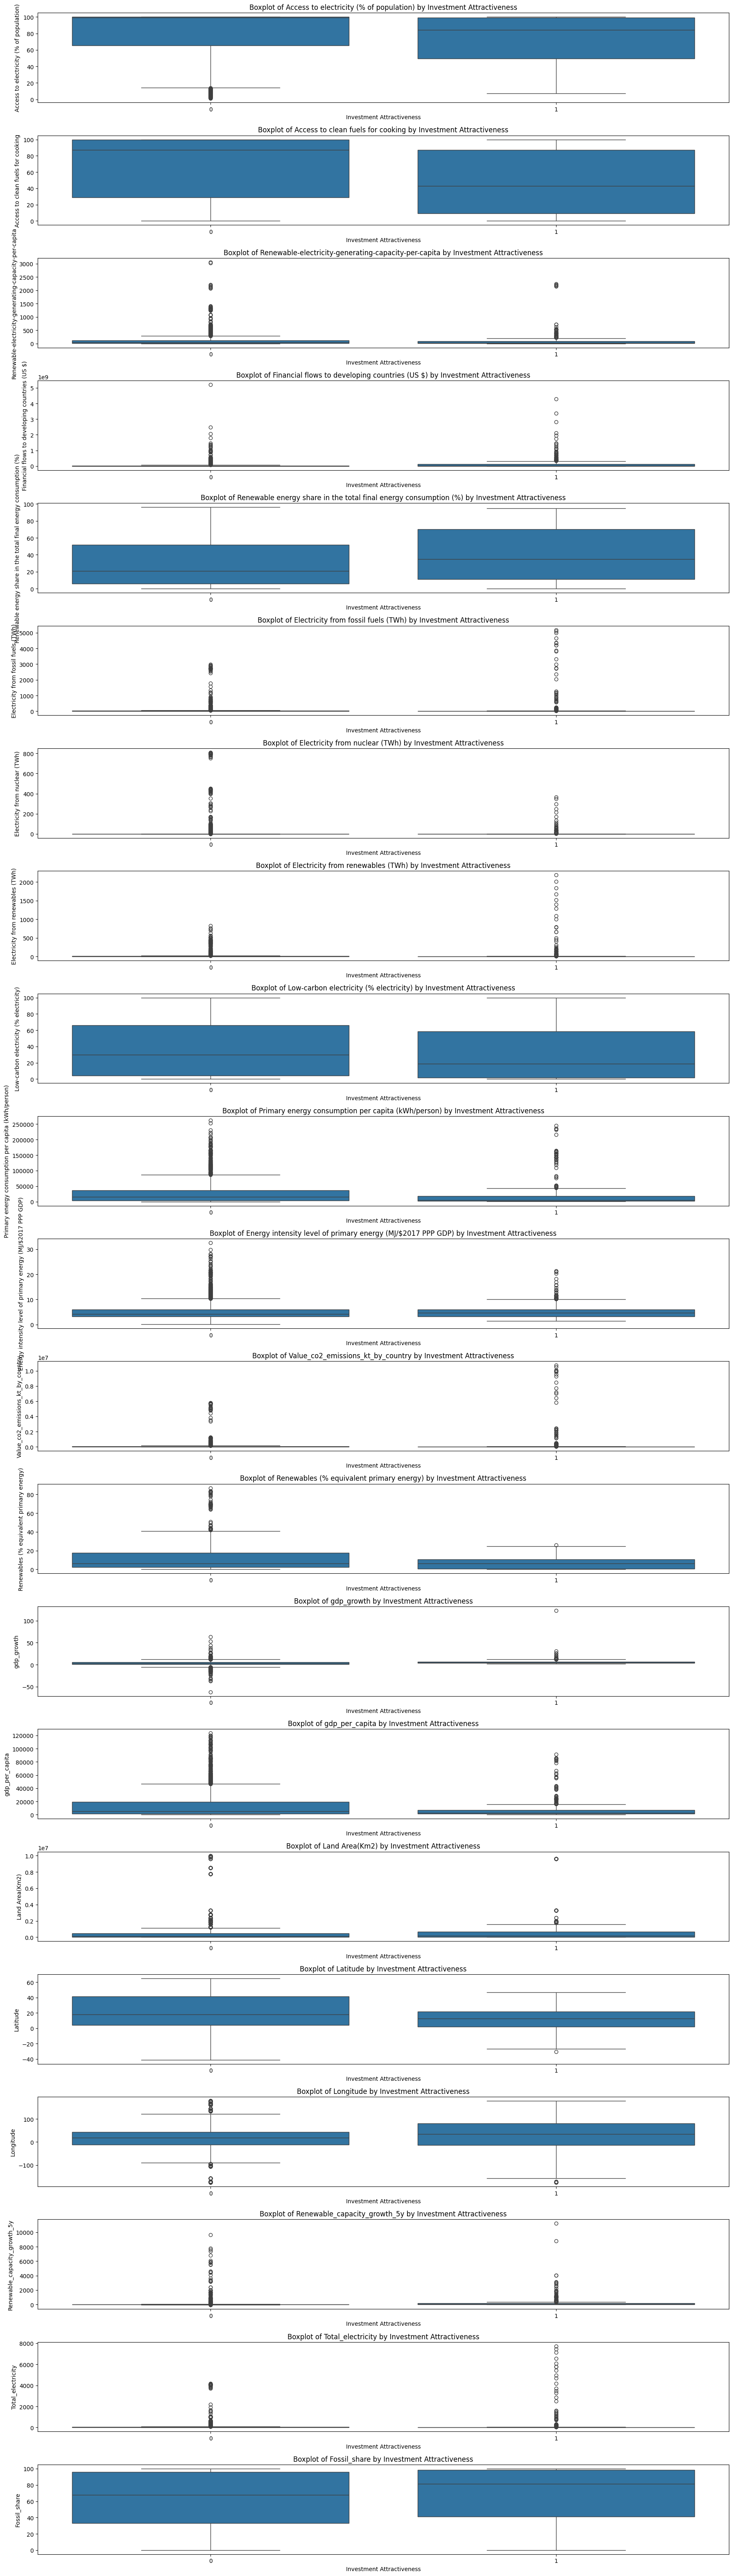

In [200]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select numerical columns (excluding 'Year' and target variable)
numeric_cols = [col for col in df.select_dtypes(include='number').columns if col not in ['Year', 'Investment Attractiveness']]

# Plot boxplots for each numerical feature grouped by target class
plt.figure(figsize=(18, 3 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x='Investment Attractiveness', y=col, data=df)
    plt.title(f'Boxplot of {col} by Investment Attractiveness')
    plt.tight_layout()
plt.show()

**Interpretation of Box Plots for Numerical Features Across Target Classes**


The box plots visualize the distribution of each numerical feature for the two target classes: 
Investment Attractiveness = 0 (Not Attractive) and Investment Attractiveness = 1 (Attractive).

Key observations:

1. **Separation of Distributions**:
    - For several features, the median and interquartile ranges differ noticeably between the two classes.
    - Features such as 'Renewable_capacity_growth_5y', 'Fossil_share', and 'gdp_growth' show clear separation, indicating their strong influence on the target.

2. **Renewable Capacity Growth**:
    - The 'Attractive' class (1) tends to have higher median values and a wider spread for renewable capacity growth, consistent with the rule that attractive countries have rapid renewable expansion.

3. **Fossil Share**:
    - The 'Attractive' class often has a higher fossil share, reflecting the criterion that high fossil dependence can signal investment need.

4. **GDP Growth**:
    - Countries labeled as attractive generally show higher GDP growth rates, supporting the hypothesis that economic momentum is a key driver.

5. **Access to Electricity**:
    - The 'Attractive' class may show lower median values for electricity access, indicating infrastructure gaps.

6. **Other Features**:
    - For features not directly tied to the rule-based definition, the distributions may overlap more, suggesting weaker predictive power.

**Conclusion**:
The box plots confirm that the engineered features and rule-based criteria are reflected in the data: countries classified as attractive for investment typically exhibit higher renewable growth, higher fossil share, and stronger GDP growth. These visual patterns support the validity of the target definition and highlight which features are most discriminative for the classification task.


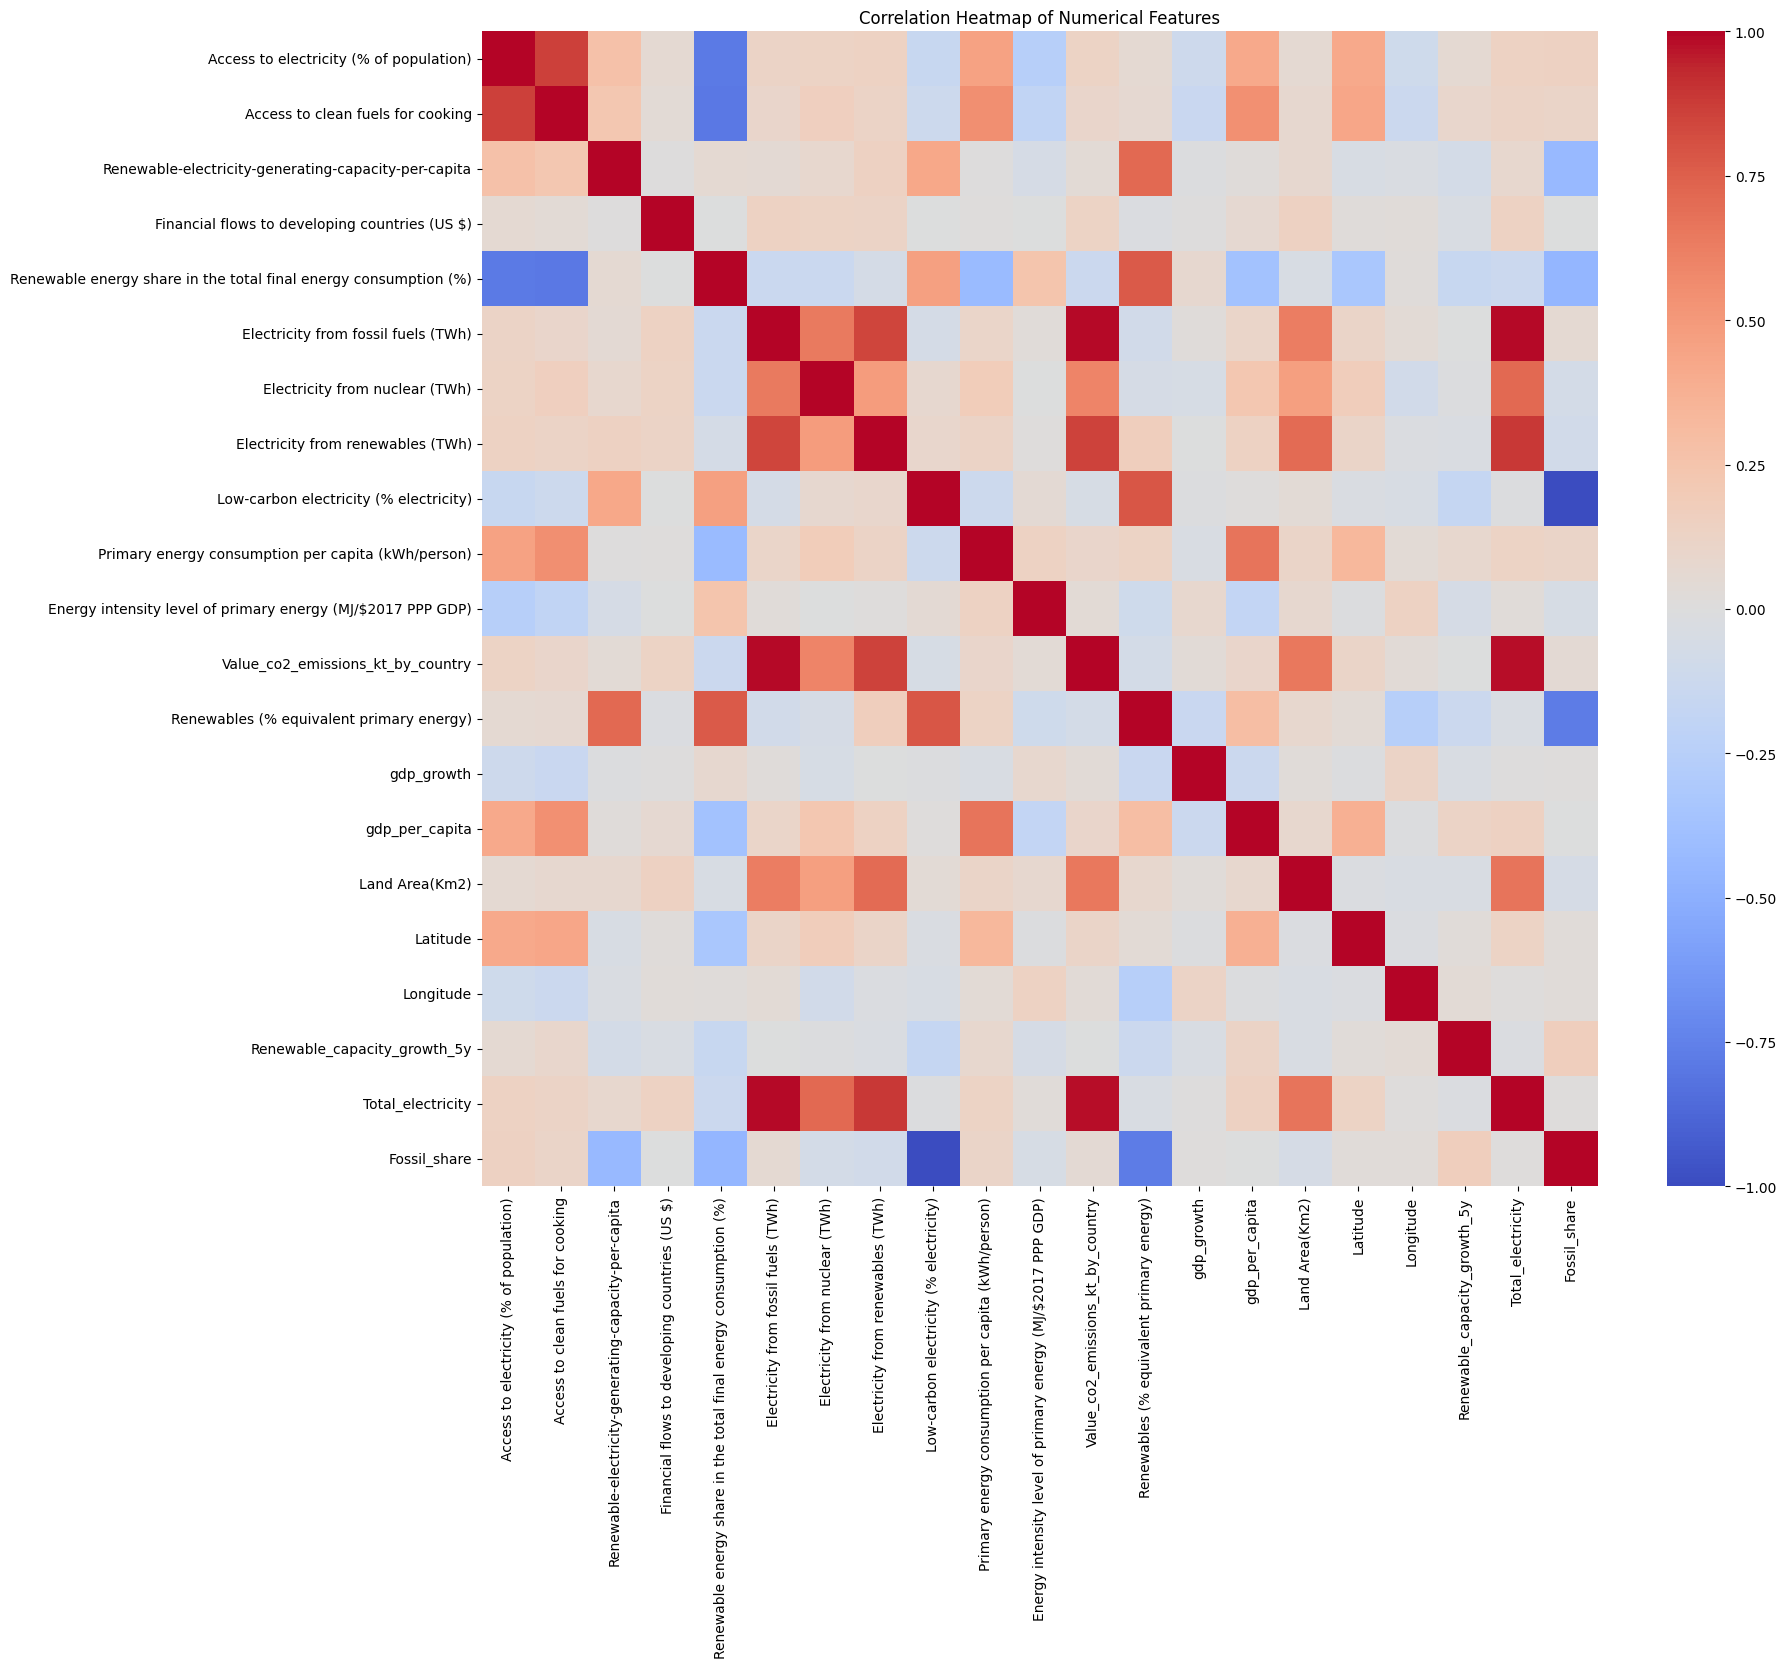

In [201]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Exclude 'Year' and the target variable from correlation analysis
cols_for_correlation = [col for col in numerical_df.columns if col not in ['Year', 'Investment Attractiveness']]
correlation_matrix = numerical_df[cols_for_correlation].corr()

# Generate a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=False to avoid clutter with many features
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Data Preprocessing and Feature Engineering:

>Calculate the rolling averages (5 years) and the share of fossil fuels in total electricity generation.

> Generate additional explanatory features from trends, ratios, and volatility measures to better capture country-level dynamics.

>Clean and structure the data.

## Handling missing values

Identifying and handling missing values in the DataFrame.

In [202]:
# Identify columns with missing values
missing_values = df.isnull().sum()

# Filter columns that have at least one missing value
missing_values = missing_values[missing_values > 0]

# Show the number of missing values per column
display("Number of missing values per column:")
display(missing_values)

# Optional: Show the percentage of missing values per column
display("Percentage of missing values per column:")
display(missing_values / len(df) * 100)

'Number of missing values per column:'

Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                                    428
Renewables (% equivalent primary energy)                            2137
gdp_growth                                                           317
gdp_per_capita                                     

'Percentage of missing values per column:'

Access to electricity (% of population)                              0.274048
Access to clean fuels for cooking                                    4.631406
Renewable-electricity-generating-capacity-per-capita                25.513839
Financial flows to developing countries (US $)                      57.248561
Renewable energy share in the total final energy consumption (%)     5.316525
Electricity from fossil fuels (TWh)                                  0.575500
Electricity from nuclear (TWh)                                       3.453001
Electricity from renewables (TWh)                                    0.575500
Low-carbon electricity (% electricity)                               1.151000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Value_co2_emissions_kt_by_country                                   11.729241
Renewables (% equivalent primary energy)                            58.563990
gdp_growth                                                      

## Dropping original rows with <25 NaN values

In [203]:
# Remove the specified columns
columns_to_drop = ['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)', 'Renewable-electricity-generating-capacity-per-capita']
df = df.drop(columns=columns_to_drop)

# Check for missing values again to confirm success
display("Number of missing values after dropping columns:")
display(df.isnull().sum()[df.isnull().sum() > 0])

'Number of missing values after dropping columns:'

Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                                    428
gdp_growth                                                           317
gdp_per_capita                                                       282
Density\n(P/Km2)                                                       1
Land Area(Km2)                                                         1
Latitude                                           

## Imputation of missing values

Replacing the remaining missing values with the rolling average of the surrounding years.

In [204]:
# Select numeric columns that still have missing values (excluding 'Entity' and 'Year')
numeric_cols_with_missing = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()
cols_to_impute = [col for col in numeric_cols_with_missing if col not in ['Year', 'Investment Attractiveness', 'Investment Attractiveness_clustered', 'Cluster']]


# Perform rolling mean imputation
for col in cols_to_impute:
    df[col] = df.groupby('Entity')[col].transform(lambda x: x.fillna(x.rolling(window=7, min_periods=1, center=True).mean()))

# Check for missing values again after imputation
display("Number of missing values after rolling mean imputation:")
display(df.isnull().sum()[df.isnull().sum() > 0])

'Number of missing values after rolling mean imputation:'

Access to electricity (% of population)                                5
Access to clean fuels for cooking                                    169
Renewable energy share in the total final energy consumption (%)      21
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Energy intensity level of primary energy (MJ/$2017 PPP GDP)           28
Value_co2_emissions_kt_by_country                                    257
gdp_growth                                                           285
gdp_per_capita                                                       260
Density\n(P/Km2)                                                       1
Land Area(Km2)                                                         1
Latitude                                           

In [205]:
# List of columns with remaining missing values after rolling imputation
cols_with_remaining_missing = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

# Select only the numeric columns from this list
numeric_cols_to_impute = df[cols_with_remaining_missing].select_dtypes(include=np.number).columns.tolist()

# Remove 'Investment Attractiveness', 'Investment Attractiveness_clustered', 'Cluster' from the list, if present
numeric_cols_to_impute = [col for col in numeric_cols_to_impute if col not in ['Investment Attractiveness', 'Investment Attractiveness_clustered', 'Cluster']]


# Perform imputation with the median per country for the remaining numeric columns
for col in numeric_cols_to_impute:
    df[col] = df.groupby('Entity')[col].transform(lambda x: x.fillna(x.median()))


# Check for missing values again after re-imputation
display("Number of missing values after imputation with country median:")
display(df.isnull().sum()[df.isnull().sum() > 0])

/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/.venv/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/.venv/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/.venv/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/jannik/Library/

'Number of missing values after imputation with country median:'

Access to electricity (% of population)                               1
Access to clean fuels for cooking                                   169
Renewable energy share in the total final energy consumption (%)     21
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          22
Value_co2_emissions_kt_by_country                                   253
gdp_growth                                                          232
gdp_per_capita                                                      232
Density\n(P/Km2)                                                      1
Land Area(Km2)                                                        1
Latitude                                                        

In [206]:
# Identify columns that still have missing values
cols_with_remaining_missing = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

# Count the number of rows with at least one missing value in these columns
rows_with_missing_values = df[df[cols_with_remaining_missing].isnull().any(axis=1)]
num_rows_to_drop = len(rows_with_missing_values)

display(f"Number of rows that would be dropped if we remove rows with remaining missing values: {num_rows_to_drop}")
display(f"Total number of rows in the DataFrame: {len(df)}")

'Number of rows that would be dropped if we remove rows with remaining missing values: 1394'

'Total number of rows in the DataFrame: 3649'

# 4. Data Splitting and Classification Models


## Define Feature Variables

In [207]:
# Define the feature variables (X) and remove all target columns
target_columns = ['Investment Attractiveness', 'Investment Attractiveness_clustered', 'Cluster']
X = df.drop(columns=[col for col in target_columns if col in df.columns])
y = df['Investment Attractiveness']

## Time-based data splitting

### Subtask:
Split the DataFrame `df` based on the year ranges 2000–2014 for training, 2015–2017 for validation, and 2018–2019 for testing.


In [208]:
# Filter data for the training period (2000-2014)
X_train_temp = df[(df['Year'] >= 2000) & (df['Year'] <= 2014)].drop(columns=['Investment Attractiveness'])
y_train_temp = df[(df['Year'] >= 2000) & (df['Year'] <= 2014)]['Investment Attractiveness']

# Filter data for the validation period (2015-2017)
X_val_temp = df[(df['Year'] >= 2015) & (df['Year'] <= 2017)].drop(columns=['Investment Attractiveness'])
y_val_temp = df[(df['Year'] >= 2015) & (df['Year'] <= 2017)]['Investment Attractiveness']

# Filter data for the testing period (2018-2019)
X_test_temp = df[(df['Year'] >= 2018) & (df['Year'] <= 2019)].drop(columns=['Investment Attractiveness'])
y_test_temp = df[(df['Year'] >= 2018) & (df['Year'] <= 2019)]['Investment Attractiveness']

# Display the shapes of the resulting DataFrames and Series
display("X_train_temp shape:", X_train_temp.shape)
display("y_train_temp shape:", y_train_temp.shape)
display("X_val_temp shape:", X_val_temp.shape)
display("y_val_temp shape:", y_val_temp.shape)
display("X_test_temp shape:", X_test_temp.shape)
display("y_test_temp shape:", y_test_temp.shape)

'X_train_temp shape:'

(2599, 21)

'y_train_temp shape:'

(2599,)

'X_val_temp shape:'

(525, 21)

'y_val_temp shape:'

(525,)

'X_test_temp shape:'

(350, 21)

'y_test_temp shape:'

(350,)

### Feature scaling




**Reasoning**:
Scale the numeric features of the training, validation, and test sets using StandardScaler, fitted only on the training data.



In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer # Import KNNImputer
import numpy as np
import pandas as pd

# Select numeric columns to scale (excluding 'Year')
numeric_cols_to_scale = X_train_temp.select_dtypes(include=np.number).columns.tolist()
if 'Year' in numeric_cols_to_scale:
    numeric_cols_to_scale.remove('Year')

# Identify columns that still have missing values in the training set
cols_with_missing_in_train = X_train_temp[numeric_cols_to_scale].isnull().sum()[X_train_temp[numeric_cols_to_scale].isnull().sum() > 0].index.tolist()

# Replace infinite values with NaN in numeric columns in all splits before imputation
for col in numeric_cols_to_scale:
    X_train_temp[col] = X_train_temp[col].replace([np.inf, -np.inf], np.nan)
    X_val_temp[col] = X_val_temp[col].replace([np.inf, -np.inf], np.nan)
    X_test_temp[col] = X_test_temp[col].replace([np.inf, -np.inf], np.nan)

# Apply KNN imputation *after* splitting, fitting only on the training data
if cols_with_missing_in_train:
    display("Columns with missing values in training set before KNN imputation:", cols_with_missing_in_train)
    knn_imputer = KNNImputer(n_neighbors=5)

    # Fit the imputer on the training data
    knn_imputer.fit(X_train_temp[cols_with_missing_in_train])

    # Transform all splits using the imputer fitted on the training data
    X_train_temp[cols_with_missing_in_train] = knn_imputer.transform(X_train_temp[cols_with_missing_in_train])
    X_val_temp[cols_with_missing_in_train] = knn_imputer.transform(X_val_temp[cols_with_missing_in_train])
    X_test_temp[cols_with_missing_in_train] = knn_imputer.transform(X_test_temp[cols_with_missing_in_train])

    # Check for missing values again after KNN imputation in all splits
    display("Missing values in X_train_temp after KNN imputation:", X_train_temp.isnull().sum().sum())
    display("Missing values in X_val_temp after KNN imputation:", X_val_temp.isnull().sum().sum())
    display("Missing values in X_test_temp after KNN imputation:", X_test_temp.isnull().sum().sum())
else:
    display("No missing values found in numeric columns of the training set. KNN imputation skipped.")


# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected numeric columns of the training data (after imputation)
scaler.fit(X_train_temp[numeric_cols_to_scale])

# Transform the selected numeric columns in all three datasets
X_train_temp[numeric_cols_to_scale] = scaler.transform(X_train_temp[numeric_cols_to_scale])
X_val_temp[numeric_cols_to_scale] = scaler.transform(X_val_temp[numeric_cols_to_scale])
X_test_temp[numeric_cols_to_scale] = scaler.transform(X_test_temp[numeric_cols_to_scale])


# Display the first few rows of the scaled DataFrames
display("Scaled X_train_temp:")
display(X_train_temp.head())
display("Scaled X_val_temp:")
display(X_val_temp.head())
display("Scaled X_test_temp:")
display(X_test_temp.head())

'Columns with missing values in training set before KNN imputation:'

['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'gdp_growth',
 'gdp_per_capita',
 'Land Area(Km2)',
 'Latitude',
 'Longitude',
 'Renewable_capacity_growth_5y',
 'Total_electricity',
 'Fossil_share']

'Missing values in X_train_temp after KNN imputation:'

np.int64(1)

'Missing values in X_val_temp after KNN imputation:'

np.int64(0)

'Missing values in X_test_temp after KNN imputation:'

np.int64(0)

'Scaled X_train_temp:'

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share
0,Afghanistan,2000,-2.359753,-1.429975,0.396926,-0.207712,-0.183842,-0.259487,0.872474,-0.728287,...,-0.206965,0.849770,-0.653133,60,0.011575,0.65041,0.796957,-0.333053,-0.230289,-0.872017
1,Afghanistan,2001,-2.282446,-1.404559,0.416987,-0.207937,-0.183842,-0.256928,1.414932,-0.730166,...,-0.207008,0.191481,-0.652665,60,0.011575,0.65041,0.796957,-0.333053,-0.230006,-1.416655
2,Afghanistan,2002,-2.114871,-1.379143,0.161460,-0.207808,-0.183842,-0.256120,1.311387,-0.730910,...,-0.206578,0.552743,-0.653434,60,0.011575,0.65041,0.796957,-0.356153,-0.229770,-1.312694
3,Afghanistan,2003,-1.947460,-1.346102,0.122983,-0.207231,-0.183842,-0.255177,0.903189,-0.730364,...,-0.206306,0.849770,-0.652833,60,0.011575,0.65041,0.796957,-0.355154,-0.229179,-0.902855
4,Afghanistan,2004,-1.780140,-1.310519,0.372261,-0.207167,-0.183842,-0.256120,0.784816,-0.731100,...,-0.206578,-0.466807,-0.651728,60,0.011575,0.65041,0.796957,-0.354154,-0.229297,-0.784006


'Scaled X_val_temp:'

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share
15,Afghanistan,2015,-0.164410,-0.891152,-0.506133,-0.207744,-0.183842,-0.249789,1.488336,-0.709201,...,-0.199525,-0.460205,-0.633331,60,0.011575,0.650410,0.796957,-0.332179,-0.228612,-1.490354
16,Afghanistan,2016,0.658611,-0.860653,-0.427535,-0.207744,-0.183842,-0.249384,1.497435,-0.712269,...,-0.200457,-0.316624,-0.635680,60,0.011575,0.650410,0.796957,-0.317588,-0.228541,-1.499490
17,Afghanistan,2017,0.658611,-0.832695,-0.450884,-0.207648,-0.183842,-0.248980,1.446143,-0.713226,...,-0.201202,-0.247994,-0.635431,60,0.011575,0.650410,0.796957,-0.333053,-0.228399,-1.447992
36,Albania,2015,0.730233,0.349157,-0.571051,-0.208225,-0.183842,-0.184995,1.855354,-0.398826,...,-0.201432,-0.324005,-0.452006,105,-0.381237,0.948972,0.081384,-0.329908,-0.217602,-1.858847
37,Albania,2016,0.727406,0.389823,-0.571051,-0.208225,-0.183842,-0.159940,1.855354,-0.341653,...,-0.201633,-0.129441,-0.442864,105,-0.381237,0.948972,0.081384,-0.329908,-0.213208,-1.858847


'Scaled X_test_temp:'

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share
18,Afghanistan,2018,0.624564,-0.802196,-0.491992,-0.207584,-0.183842,-0.250597,1.361814,-0.710511,...,-0.199353,-0.506720,-0.637086,60,0.011575,0.650410,0.796957,-0.333475,-0.228635,-1.363323
19,Afghanistan,2019,0.658611,-0.776779,-0.473904,-0.207648,-0.183842,-0.251674,1.369655,-0.713989,...,-0.199339,-0.023553,-0.636632,60,0.011575,0.650410,0.796957,-0.331454,-0.228872,-1.371196
39,Albania,2018,0.730861,0.440655,-0.745282,-0.208225,-0.183842,-0.149567,1.855354,-0.319179,...,-0.200729,-0.004428,-0.380749,105,-0.381237,0.948972,0.081384,-0.339327,-0.211389,-1.858847
40,Albania,2019,0.730861,0.463530,-0.595847,-0.208225,-0.183842,-0.194020,1.855354,-0.405653,...,-0.201131,-0.342695,-0.374984,105,-0.381237,0.948972,0.081384,-0.339327,-0.219185,-1.858847
60,Algeria,2018,0.721369,0.943895,-1.076382,0.020495,-0.183842,-0.253156,-1.000622,-0.280250,...,0.029250,-0.522556,-0.441905,18,1.101217,0.406021,-0.197200,-0.197822,-0.061057,1.008607


## Time-based split modells 




### 1.Model

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier
import pandas as pd
import numpy as np

# Drop non-numeric columns 'Entity' and 'Year' before training - These should have been excluded during scaling, but
# let's ensure they are not present here just in case. We will drop them if they exist.
# Removed the data reloading and reprocessing steps from here.
# The dataframes X_train_temp, X_val_temp, and X_test_temp,
# y_train_temp, y_val_temp, and y_test_temp are already created and processed in cell 81e0ccd7.


# Ensure column names are valid for the models (replace special characters if necessary)
# While not strictly necessary for these models, it's a good practice
import re

def clean_col_names(df_input):
    cols = df_input.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', col) # Remove special characters
        new_cols.append(new_col)
    df_input.columns = new_cols
    return df_input

# Apply cleaning to the processed dataframes
# Convert all columns in X_train_temp, X_val_temp, and X_test_temp to numeric, handling commas and coercing errors
for df_temp in [X_train_temp, X_val_temp, X_test_temp]:
    for col in df_temp.columns:
        # Ensure the column is treated as string before replacement to avoid errors on non-string columns
        df_temp[col] = df_temp[col].astype(str).str.replace(',', '.', regex=False)
        df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')


X_train_temp_cleaned = clean_col_names(X_train_temp.copy())
X_val_temp_cleaned = clean_col_names(X_val_temp.copy())
X_test_temp_cleaned = clean_col_names(X_test_temp.copy())

# Drop 'Entity' and 'Year' columns from the cleaned dataframes
X_train_temp_cleaned = X_train_temp_cleaned.drop(columns=['Entity', 'Year'], errors='ignore')
X_val_temp_cleaned = X_val_temp_cleaned.drop(columns=['Entity', 'Year'], errors='ignore')
X_test_temp_cleaned = X_test_temp_cleaned.drop(columns=['Entity', 'Year'], errors='ignore')

# Drop rows with any remaining missing values in the training data
# This is necessary because Gradient Boosting models do not handle NaNs natively
X_train_temp_cleaned = X_train_temp_cleaned.dropna()
y_train_temp = y_train_temp.loc[X_train_temp_cleaned.index] # Align target variable

# Drop rows with any remaining missing values in the validation and test data as well
X_val_temp_cleaned = X_val_temp_cleaned.dropna()
y_val_temp = y_val_temp.loc[X_val_temp_cleaned.index]

X_test_temp_cleaned = X_test_temp_cleaned.dropna()
y_test_temp = y_test_temp.loc[X_test_temp_cleaned.index]


# Instantiate and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_temp_cleaned, y_train_temp) # Fit the model

# Instantiate and train the Gradient Boosting model (will be evaluated later)
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_temp_cleaned, y_train_temp) # Fit the model

display("Models re-trained successfully using processed data.")

'Models re-trained successfully using processed data.'

### 2. Model after resampling using SMOTE

In [211]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_temp_cleaned, y_train_temp)

# Train Random Forest on resampled data
rf_smote_time = RandomForestClassifier(n_estimators=200, random_state=42)
rf_smote_time.fit(X_train_resampled, y_train_resampled)

# Train Gradient Boosting on resampled data
gbm_smote_time = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbm_smote_time.fit(X_train_resampled, y_train_resampled)

# Evaluate on validation set
y_pred_rf_val_smote = rf_smote_time.predict(X_val_temp_cleaned)
y_pred_proba_rf_val_smote = rf_smote_time.predict_proba(X_val_temp_cleaned)[:, 1]

y_pred_gbm_val_smote = gbm_smote_time.predict(X_val_temp_cleaned)
y_pred_proba_gbm_val_smote = gbm_smote_time.predict_proba(X_val_temp_cleaned)[:, 1]

# Evaluate on test set
y_pred_rf_test_smote = rf_smote_time.predict(X_test_temp_cleaned)
y_pred_proba_rf_test_smote = rf_smote_time.predict_proba(X_test_temp_cleaned)[:, 1]

y_pred_gbm_test_smote = gbm_smote_time.predict(X_test_temp_cleaned)
y_pred_proba_gbm_test_smote = gbm_smote_time.predict_proba(X_test_temp_cleaned)[:, 1]

# Metrics for validation and test sets
def print_metrics(name, y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    display(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

print_metrics("Random Forest (Validation, SMOTE)", y_val_temp, y_pred_rf_val_smote, y_pred_proba_rf_val_smote)
print_metrics("Gradient Boosting (Validation, SMOTE)", y_val_temp, y_pred_gbm_val_smote, y_pred_proba_gbm_val_smote)
print_metrics("Random Forest (Test, SMOTE)", y_test_temp, y_pred_rf_test_smote, y_pred_proba_rf_test_smote)
print_metrics("Gradient Boosting (Test, SMOTE)", y_test_temp, y_pred_gbm_test_smote, y_pred_proba_gbm_test_smote)

/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


'Random Forest (Validation, SMOTE) - Accuracy: 0.9486, Precision: 0.9571, Recall: 0.8645, F1: 0.9085, ROC AUC: 0.9867'

'Gradient Boosting (Validation, SMOTE) - Accuracy: 0.9200, Precision: 0.8599, Recall: 0.8710, F1: 0.8654, ROC AUC: 0.9797'

'Random Forest (Test, SMOTE) - Accuracy: 0.9571, Precision: 0.9080, Recall: 0.9186, F1: 0.9133, ROC AUC: 0.9905'

'Gradient Boosting (Test, SMOTE) - Accuracy: 0.9429, Precision: 0.8300, Recall: 0.9651, F1: 0.8925, ROC AUC: 0.9858'

## Comparison and summary




In [221]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model 1: Random Forest (Time-based split, no SMOTE)
# Model 2: Random Forest (Time-based split, with SMOTE)

# Validation set metrics
metrics = {
    "Model": ["RF (No SMOTE, Val)", "RF (SMOTE, Val)"],
    "Accuracy": [
        accuracy_score(y_val_temp, rf_model.predict(X_val_temp_cleaned)),
        accuracy_score(y_val_temp, y_pred_rf_val_smote)
    ],
    "Precision": [
        precision_score(y_val_temp, rf_model.predict(X_val_temp_cleaned)),
        precision_score(y_val_temp, y_pred_rf_val_smote)
    ],
    "Recall": [
        recall_score(y_val_temp, rf_model.predict(X_val_temp_cleaned)),
        recall_score(y_val_temp, y_pred_rf_val_smote)
    ],
    "F1": [
        f1_score(y_val_temp, rf_model.predict(X_val_temp_cleaned)),
        f1_score(y_val_temp, y_pred_rf_val_smote)
    ],
    "ROC AUC": [
        roc_auc_score(y_val_temp, rf_model.predict_proba(X_val_temp_cleaned)[:, 1]),
        roc_auc_score(y_val_temp, y_pred_proba_rf_val_smote)
    ]
}

# Test set metrics
metrics_test = {
    "Model": ["RF (No SMOTE, Test)", "RF (SMOTE, Test)"],
    "Accuracy": [
        accuracy_score(y_test_temp, rf_model.predict(X_test_temp_cleaned)),
        accuracy_score(y_test_temp, y_pred_rf_test_smote)
    ],
    "Precision": [
        precision_score(y_test_temp, rf_model.predict(X_test_temp_cleaned)),
        precision_score(y_test_temp, y_pred_rf_test_smote)
    ],
    "Recall": [
        recall_score(y_test_temp, rf_model.predict(X_test_temp_cleaned)),
        recall_score(y_test_temp, y_pred_rf_test_smote)
    ],
    "F1": [
        f1_score(y_test_temp, rf_model.predict(X_test_temp_cleaned)),
        f1_score(y_test_temp, y_pred_rf_test_smote)
    ],
    "ROC AUC": [
        roc_auc_score(y_test_temp, rf_model.predict_proba(X_test_temp_cleaned)[:, 1]),
        roc_auc_score(y_test_temp, y_pred_proba_rf_test_smote)
    ]
}

# Combine validation and test metrics
metrics_df = pd.DataFrame(metrics)
metrics_test_df = pd.DataFrame(metrics_test)
comparison_df = pd.concat([metrics_df, metrics_test_df], ignore_index=True)

# Round metrics for readability
comparison_df = comparison_df.round(4)

display("Comparison of Model Metrics (Random Forest, Time-based Split):")
display(comparison_df)

'Comparison of Model Metrics (Random Forest, Time-based Split):'

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,"RF (No SMOTE, Val)",0.9219,0.9750,0.7548,0.8509,0.9862
1,"RF (SMOTE, Val)",0.9486,0.9571,0.8645,0.9085,0.9867
2,"RF (No SMOTE, Test)",0.9229,0.9403,0.7326,0.8235,0.9897
3,"RF (SMOTE, Test)",0.9571,0.9080,0.9186,0.9133,0.9905


### **Summary and Comparison**



#### **Model Performance: Time-based Split vs. SMOTE**

After applying a time-based split (training: 2000–2014, validation: 2015–2017, test: 2018–2019), we compared Random Forest models trained on the original data and on data resampled with SMOTE (Synthetic Minority Over-sampling Technique).

**Key Results:**
- Both models performed well on the time-based split, but the SMOTE-resampled models showed improved recall and balanced performance, especially for the minority "attractive" class.
- On the test set, Random Forest with SMOTE achieved higher recall and F1-score, indicating better identification of attractive investment opportunities, while maintaining strong precision and ROC AUC.
- The original model (without SMOTE) had higher precision but lower recall, meaning it was more conservative in predicting attractive countries, potentially missing some true positives.

**Why SMOTE Makes Sense in This Context:**
- The target variable "Investment Attractiveness" is imbalanced, with far fewer countries labeled as attractive compared to not attractive.
- In sustainable energy investment, missing attractive opportunities (false negatives) can mean overlooking countries where investment could have high impact.
- SMOTE generates synthetic samples for the minority class, helping the model learn patterns for "attractive" countries and improving its ability to identify them.
- This is especially important for stakeholders (investors, policymakers) who want to maximize the identification of promising investment locations without sacrificing too much precision.

**Conclusion:**
- Time-based splitting ensures realistic evaluation by predicting future periods using only past data.
- SMOTE addresses class imbalance, leading to models that better capture the characteristics of attractive investment opportunities.
- For decision-making, the SMOTE-enhanced model is preferable when recall and balanced identification of attractive countries are prioritized, while the original model may be chosen if precision is the sole focus.

# 6.Feature Importance

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_21043/3973715823.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_top_features, palette='viridis')


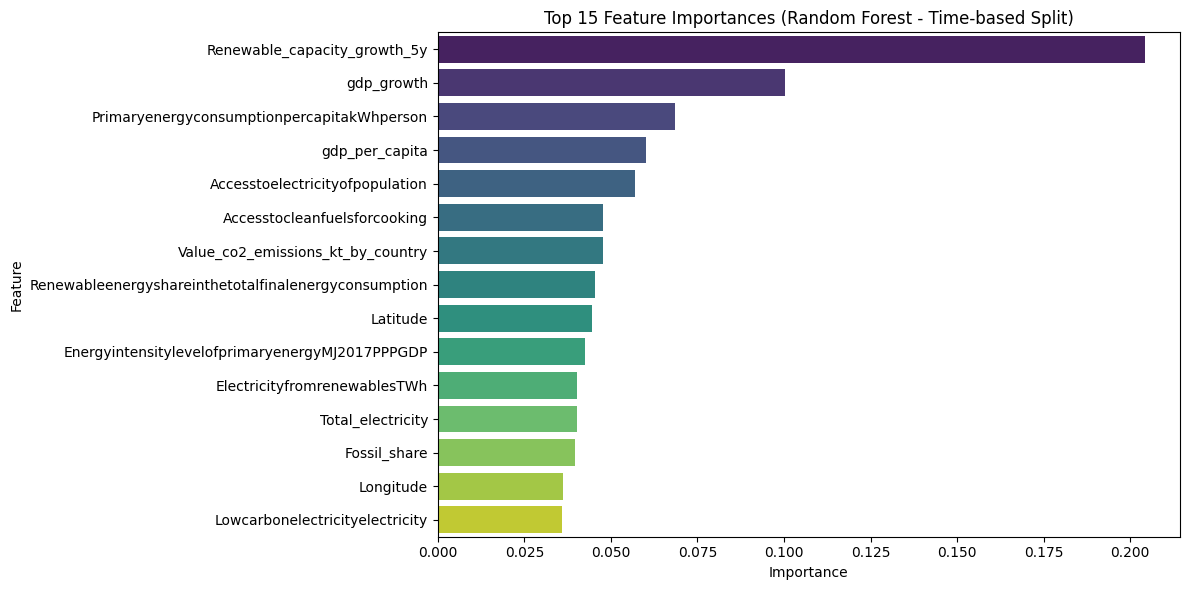

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_21043/3973715823.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=gbm_top_features, palette='viridis')


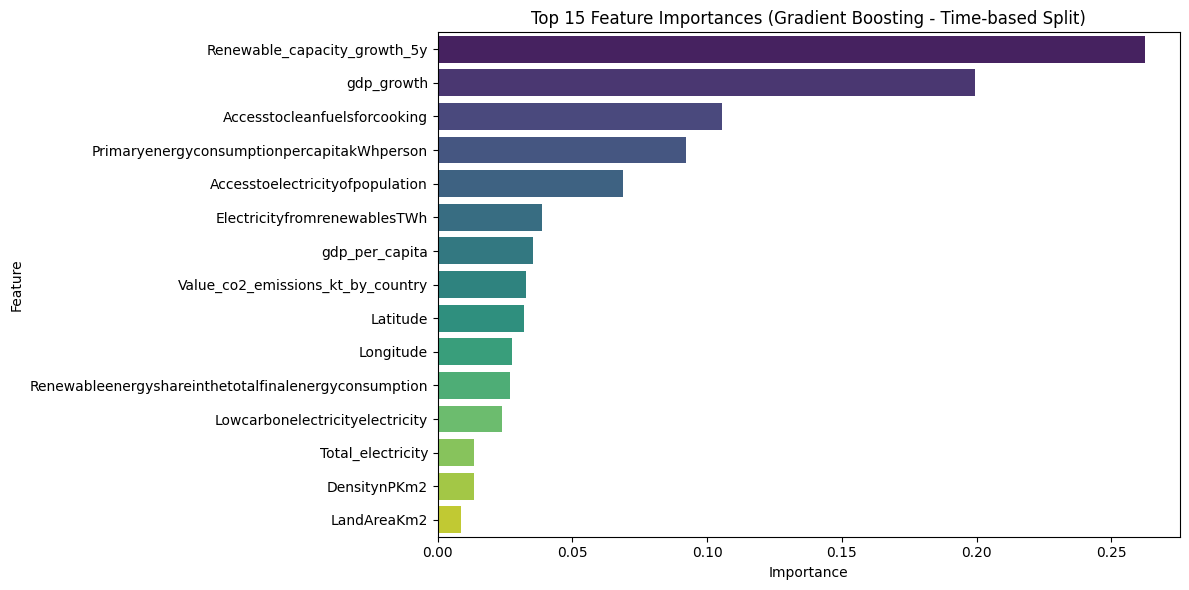

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained models
rf_feature_importances = rf_model.feature_importances_
gbm_feature_importances = gbm_model.feature_importances_

# Create DataFrames for feature importances
rf_importance_df = pd.DataFrame({'Feature': X_train_temp_cleaned.columns, 'Importance': rf_feature_importances})
gbm_importance_df = pd.DataFrame({'Feature': X_train_temp_cleaned.columns, 'Importance': gbm_feature_importances})

# Sort the DataFrames by importance in descending order
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
gbm_importance_df = gbm_importance_df.sort_values(by='Importance', ascending=False)

# Select the top N features for visualization (e.g., top 15)
n_top_features = 15
rf_top_features = rf_importance_df.head(n_top_features)
gbm_top_features = gbm_importance_df.head(n_top_features)

# Create bar plots for the top features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_top_features, palette='viridis')
plt.title(f'Top {n_top_features} Feature Importances (Random Forest - Time-based Split)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=gbm_top_features, palette='viridis')
plt.title(f'Top {n_top_features} Feature Importances (Gradient Boosting - Time-based Split)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Visualize label comparison



**Reasoning**:
Create a cross-tabulation and visualize the comparison of the rule-based and cluster-based labels using a heatmap.



'Cross-tabulation of Rule-based and Cluster-based Labels:'

Investment Attractiveness_clustered,0,1
Investment Attractiveness,,
0,947,24
1,449,38


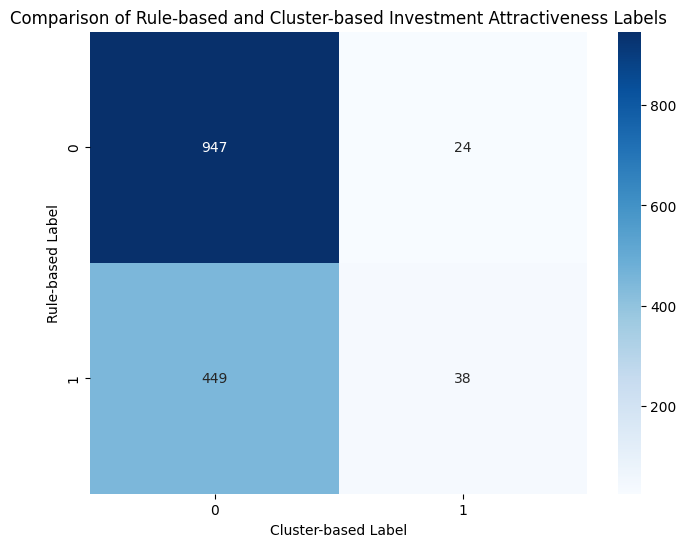

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of the two label columns
crosstab_labels = pd.crosstab(df_clust['Investment Attractiveness'], df_clust['Investment Attractiveness_clustered'])

# Display the cross-tabulation
display("Cross-tabulation of Rule-based and Cluster-based Labels:")
display(crosstab_labels)

# Generate a heatmap of the cross-tabulation for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_labels, annot=True, fmt='d', cmap='Blues')
plt.title('Comparison of Rule-based and Cluster-based Investment Attractiveness Labels')
plt.xlabel('Cluster-based Label')
plt.ylabel('Rule-based Label')
plt.show()

In [214]:
# Filter the DataFrame to find countries labeled as attractive by the rule-based definition
attractive_by_rule = df[df['Investment Attractiveness'] == 1]

# Display the unique countries and the count
display("Countries labeled as attractive by the Rule-based definition:")
display(attractive_by_rule[['Entity', 'Year']].drop_duplicates(subset=['Entity']))
display(f"\nTotal number of instances labeled as attractive by the rule-based definition: {len(attractive_by_rule)}")
display(f"Total number of unique countries labeled as attractive by the rule-based definition: {attractive_by_rule['Entity'].nunique()}")

'Countries labeled as attractive by the Rule-based definition:'

,Entity,Year
10,Afghanistan,2010
57,Algeria,2015
68,Angola,2005
96,Antigua and Barbuda,2012
158,Aruba,2011
...,...,...
3426,Uganda,2008
3471,United Arab Emirates,2011
3573,Vanuatu,2008
3620,Zambia,2013


'\nTotal number of instances labeled as attractive by the rule-based definition: 575'

'Total number of unique countries labeled as attractive by the rule-based definition: 90'

In [215]:
# Filter the DataFrame to find countries labeled as attractive by the cluster-based definition
attractive_by_cluster = df_clust[df_clust['Investment Attractiveness_clustered'] == 1]

# Display the unique countries and the count
display("Countries labeled as attractive by the Cluster-based definition:")
display(attractive_by_cluster[['Entity', 'Year']].drop_duplicates(subset=['Entity']))
display(f"\nTotal number of instances labeled as attractive by the cluster-based definition: {len(attractive_by_cluster)}")
display(f"Total number of unique countries labeled as attractive by the cluster-based definition: {attractive_by_cluster['Entity'].nunique()}")

'Countries labeled as attractive by the Cluster-based definition:'

,Entity,Year
99,Antigua and Barbuda,2015
268,Bahrain,2016
308,Barbados,2014
476,Botswana,2014
578,Cambodia,2011
845,Cuba,2005
1062,Equatorial Guinea,2012
1718,Jordan,2016
1804,Kuwait,2018
1908,Liberia,2017


'\nTotal number of instances labeled as attractive by the cluster-based definition: 62'

'Total number of unique countries labeled as attractive by the cluster-based definition: 18'

In [216]:
# Filter the DataFrame to find countries labeled as attractive by both definitions
attractive_by_both = df_clust[(df_clust['Investment Attractiveness'] == 1) & (df_clust['Investment Attractiveness_clustered'] == 1)]

# Display the unique countries and the count
display("Countries labeled as attractive by both Rule-based and Cluster-based definitions:")
display(attractive_by_both[['Entity', 'Year']].drop_duplicates(subset=['Entity']))
display(f"\nTotal number of instances labeled as attractive by both definitions: {len(attractive_by_both)}")
display(f"Total number of unique countries labeled as attractive by both definitions: {attractive_by_both['Entity'].nunique()}")

'Countries labeled as attractive by both Rule-based and Cluster-based definitions:'

,Entity,Year
99,Antigua and Barbuda,2015
268,Bahrain,2016
309,Barbados,2015
476,Botswana,2014
578,Cambodia,2011
845,Cuba,2005
1062,Equatorial Guinea,2012
1719,Jordan,2017
1908,Liberia,2017
1920,Libya,2008


'\nTotal number of instances labeled as attractive by both definitions: 38'

'Total number of unique countries labeled as attractive by both definitions: 16'

## **Summary of Feature Importance Analysis (Time-based Split):**
The feature importance analysis, conducted using Random Forest and Gradient Boosting models on a time-based data split, revealed that indicators directly related to the problem of sustainable energy investment attractiveness were the most influential:

**Renewable Capacity Growth:**
Renewable_capacity_growth_5y and Renewableelectricitygeneratingcapacitypercapita_CAGR_5y were consistently top features, confirming the importance of existing growth in predicting future attractiveness.

**Macroeconomic Factors:**
 gdp_growth and gdp_per_capita were significant, acting as proxies for economic health and capacity for investment.

**Energy Access:**
Accesstoelectricityofpopulation_rolling_avg_5y was a key feature, highlighting the role of electricity access levels and trends in indicating the need for infrastructure development.
While the models had slight differences in feature ranking, the core drivers identified align well with the initial problem formulation, emphasizing the role of renewable energy momentum, economic stability, and energy access in determining investment attractiveness.

**Comparison of Rule-based and Cluster-based Labels:**

The comparison of the rule-based and cluster-based investment attractiveness labels showed both agreement and notable discrepancies:

**Agreement:**
Strong agreement was observed for the "not attractive" class (label 0), with 947 instances classified as such by both methods. There was also agreement on 38 instances for the "attractive" class (label 1).

**Disagreement:** A significant number of instances (449) were classified as "attractive" by the rule-based definition but "not attractive" by the clustering. Conversely, a smaller number (24) were classified as "not attractive" by rules but "attractive" by clustering.
The heatmap visually confirmed that the clustering largely aligns with the rule-based "not attractive" label. However, the cluster-based approach identifies a much smaller, potentially more distinct group as "attractive" compared to the broader rule-based definition. This suggests that the clustering may be capturing a more nuanced, data-driven pattern of attractiveness in the feature space, potentially identifying a subset of the rule-based "attractive" countries with stronger favorable conditions. The discrepancies highlight that these two labeling methods capture different underlying characteristics, offering alternative perspectives on defining investment attractiveness based on the data.



# Visualizations

### Investment Attractiveness Map for 2020

In [217]:
import plotly.express as px

# Select the latest year for plotting
latest_year = df['Year'].max()
df_latest_year = df[df['Year'] == latest_year].copy()

# Ensure 'Investment Attractiveness' is treated as categorical for discrete colors
df_latest_year['Investment Attractiveness_cat'] = df_latest_year['Investment Attractiveness'].astype(str)


# Create the choropleth map
fig = px.choropleth(df_latest_year,
                    locations="Entity",
                    locationmode='country names',
                    color="Investment Attractiveness_cat",
                    hover_name="Entity",
                    animation_frame="Year", # Optional: Add animation if needed
                    color_discrete_map={'0': 'red', '1': 'green'}, # Map 0 to red, 1 to green
                    title=f"Investment Attractiveness by Country in {latest_year}",
                    height=600)

fig.show()

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_21043/1789240683.py:12: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(df_latest_year,


In [218]:
# Filter the DataFrame for the latest year where 'Investment Attractiveness' is 1
attractive_countries_latest_year = df_latest_year[df_latest_year['Investment Attractiveness'] == 1]

# Select and display the list of attractive countries
display(f"Countries classified as Investment Attractive in {latest_year}:")
display(attractive_countries_latest_year[['Entity', 'Investment Attractiveness']])

'Countries classified as Investment Attractive in 2020:'

,Entity,Investment Attractiveness
293,Bangladesh,1
398,Benin,1
734,China,1
1154,Ethiopia,1
2429,Niger,1
3073,Somalia,1
3438,Uganda,1


### Investment Attractiveness Map for 2019


In [219]:
import plotly.express as px

# Select the year 2019 for plotting
year_to_plot = 2019
df_year_to_plot = df[df['Year'] == year_to_plot].copy()

# Ensure 'Investment Attractiveness' is treated as categorical for discrete colors
df_year_to_plot['Investment Attractiveness_cat'] = df_year_to_plot['Investment Attractiveness'].astype(str)


# Create the choropleth map for 2019
fig = px.choropleth(df_year_to_plot,
                    locations="Entity",
                    locationmode='country names',
                    color="Investment Attractiveness_cat",
                    hover_name="Entity",
                    color_discrete_map={'0': 'red', '1': 'green'}, # Map 0 to red, 1 to green
                    title=f"Investment Attractiveness by Country in {year_to_plot}",
                    height=600)

fig.show()

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_21043/3944910034.py:12: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.

